<a href="https://colab.research.google.com/github/iamantrikshverma/iamantrikshverma/blob/main/datapreprocessing1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# new project

# Data loading

## import libraries

In [25]:
import pandas as pd

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Diabetes%20Missing%20Data.csv')

#data checking

## check data



In [12]:
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [13]:
df.tail()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1
767,1,93.0,70.0,31.0,NaN,30.4,0.315,23,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [15]:
df.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
df.describe(include='all')

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## check missing values

In [17]:
df.isnull().sum()

,0
Pregnant,0
Glucose,5
Diastolic_BP,35
Skin_Fold,227
Serum_Insulin,374
BMI,11
Diabetes_Pedigree,0
Age,0
Class,0


missing values found

## outliers/ exterma

### IQR Method

In [27]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

# lower bound and upper bound
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# identify outlier
outliers = df[(df < lower_bound) | (df > upper_bound)]

print("Outliers in 'df' using IQR method:")
outliers

Outliers in 'df' using IQR method:


,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,2.288,NaN,NaN
...,...,...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


outlier found in diabetes_pedigree
so we should clean the data first

### find duplicates

In [32]:
# prompt: find duplicates

df.duplicated().sum()
df[df.duplicated()]


,Pregnant,Glucose,Diastolic_BP,Skin_Fold,BMI,Diabetes_Pedigree,Age,Class


not found

# Data cleaning

In [28]:
# prompt: percentage of missing value in each colunm

# Percentage of missing values in each column
missing_percentage = df.isnull().sum() * 100 / len(df)
missing_percentage


,0
Pregnant,0.000000
Glucose,0.651042
Diastolic_BP,4.557292
Skin_Fold,29.557292
Serum_Insulin,48.697917
BMI,1.432292
Diabetes_Pedigree,0.000000
Age,0.000000
Class,0.000000


In [29]:

# Identify columns with more than 30% missing values
columns_to_drop = missing_percentage[missing_percentage > 30].index

# Drop the identified columns
df = df.drop(columns=columns_to_drop)




### drop missing values

In [35]:
# prompt: drop missing value

df = df.dropna()


## remove outliers

In [36]:
# prompt: remove outliers

# Reindex lower_bound and upper_bound to match df's columns
lower_bound = lower_bound[df.columns]
upper_bound = upper_bound[df.columns]

# Remove rows with outliers
df_no_outliers = df[(df >= lower_bound) & (df <= upper_bound)].dropna()

# Display the DataFrame without outliers
print("\nDataFrame after removing outliers:")
df_no_outliers


DataFrame after removing outliers:


,Pregnant,Glucose,Diastolic_BP,Skin_Fold,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,26.6,0.351,31.0,0
3,1.0,89.0,66.0,23.0,28.1,0.167,21.0,0
6,3.0,78.0,50.0,32.0,31.0,0.248,26.0,1
8,2.0,197.0,70.0,45.0,30.5,0.158,53.0,1
...,...,...,...,...,...,...,...,...
761,9.0,170.0,74.0,31.0,44.0,0.403,43.0,1
763,10.0,101.0,76.0,48.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,26.2,0.245,30.0,0


there is no duplicates so we not need to drop them

In [37]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 487 entries, 0 to 767
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           487 non-null    float64
 1   Glucose            487 non-null    float64
 2   Diastolic_BP       487 non-null    float64
 3   Skin_Fold          487 non-null    float64
 4   BMI                487 non-null    float64
 5   Diabetes_Pedigree  487 non-null    float64
 6   Age                487 non-null    float64
 7   Class              487 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 34.2 KB


In [38]:
df_no_outliers.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,BMI,Diabetes_Pedigree,Age,Class
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,3.441478,119.924025,71.277207,28.698152,32.494045,0.452663,31.162218,0.308008
std,3.158398,30.068857,11.102179,9.851639,6.354117,0.252694,10.254196,0.462145
min,0.000000,56.000000,44.000000,7.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,98.000000,64.000000,21.000000,27.800000,0.254500,23.000000,0.000000
50%,2.000000,114.000000,70.000000,29.000000,32.700000,0.399000,28.000000,0.000000
75%,5.000000,139.500000,80.000000,36.000000,36.500000,0.612500,37.000000,1.000000
max,13.000000,198.000000,104.000000,54.000000,50.000000,1.189000,63.000000,1.000000


first we should set target variable

<Axes: xlabel='Class'>

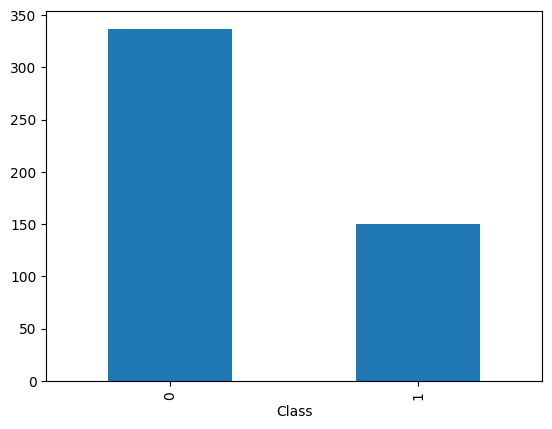

In [40]:
# prompt: check target variable distribution which is 'Class'

# Check target variable distribution
df_no_outliers['Class'].value_counts()
df_no_outliers['Class'].value_counts().plot(kind='bar')


### single relation of target variables with features

### Q1. check distribution of target variable 'class'  with  'Pregnent'.

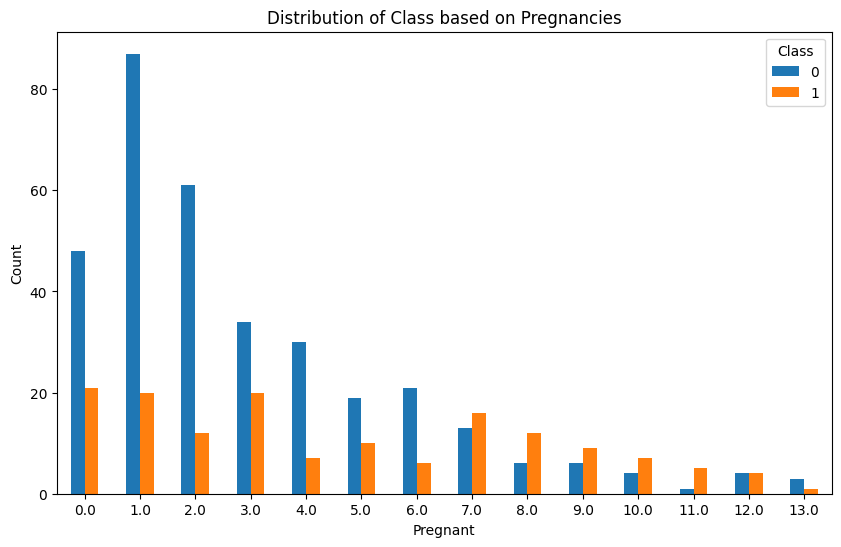

In [41]:
import matplotlib.pyplot as plt
# Assuming df_no_outliers is your cleaned DataFrame

# Group data by 'Pregnancies' and 'Class' and count occurrences
pregnancy_class_counts = df_no_outliers.groupby(['Pregnant', 'Class'])['Class'].count().unstack(fill_value=0)

# Create a bar plot to visualize the distribution
pregnancy_class_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Class based on Pregnancies')
plt.xlabel('Pregnant')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class')
plt.show()


those womens who are 1 time pregnent has less chances of having diabities

### Q2. check distribution of target variable 'class'  with  '*Diastolic_BP'.

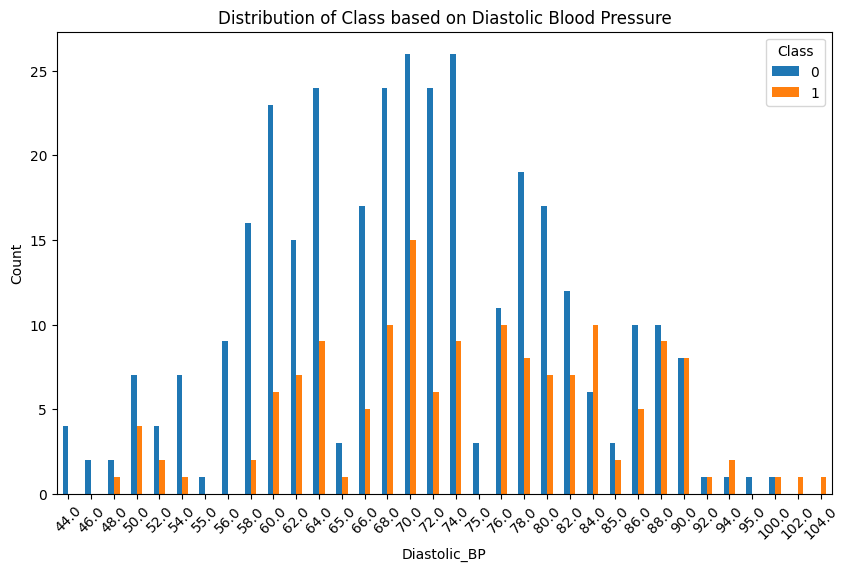

In [48]:
# Group data by 'Diastolic_BP' and 'Class' and count occurrences
diastolic_bp_class_counts = df_no_outliers.groupby(['Diastolic_BP', 'Class'])['Class'].count().unstack(fill_value=0)

# Create a bar plot to visualize the distribution
diastolic_bp_class_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Class based on Diastolic Blood Pressure')
plt.xlabel('Diastolic_BP')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Class')
plt.show()


### Q3. check distribution of target variable 'class'  with  'Skin_Fold'.

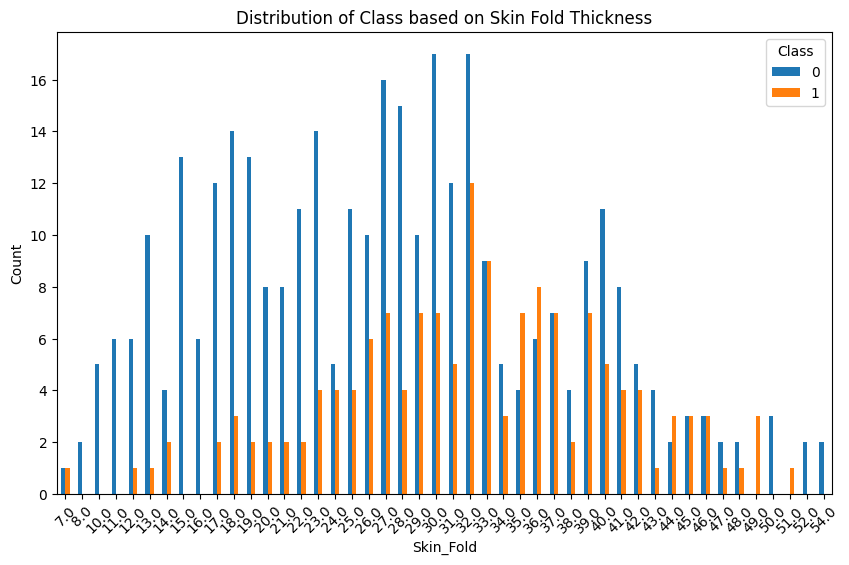

In [49]:
# Group data by 'Skin_Fold' and 'Class' and count occurrences
skin_fold_class_counts = df_no_outliers.groupby(['Skin_Fold', 'Class'])['Class'].count().unstack(fill_value=0)

# Create a bar plot to visualize the distribution
skin_fold_class_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Class based on Skin Fold Thickness')
plt.xlabel('Skin_Fold')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Class')
plt.show()


### Q4. check distribution of target variable 'class'  with  'Age'.

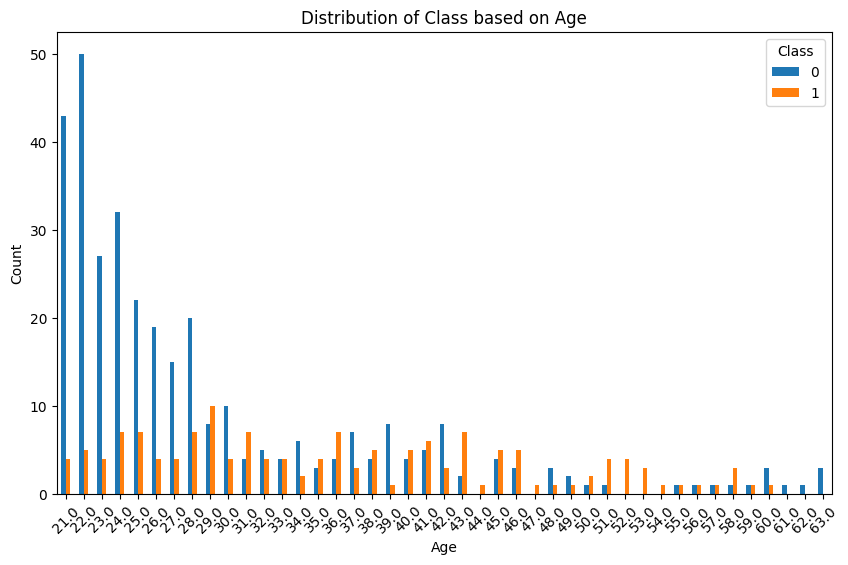

In [50]:
# Group data by 'Age' and 'Class' and count occurrences
age_class_counts = df_no_outliers.groupby(['Age', 'Class'])['Class'].count().unstack(fill_value=0)

# Create a bar plot to visualize the distribution
age_class_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Class based on Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Class')
plt.show()


In [47]:
df_no_outliers.nunique()

,0
Pregnant,14
Glucose,124
Diastolic_BP,34
Skin_Fold,46
BMI,211
Diabetes_Pedigree,377
Age,43
Class,2


### Q5. check distribution of target variable 'class'  with  'glucose'.

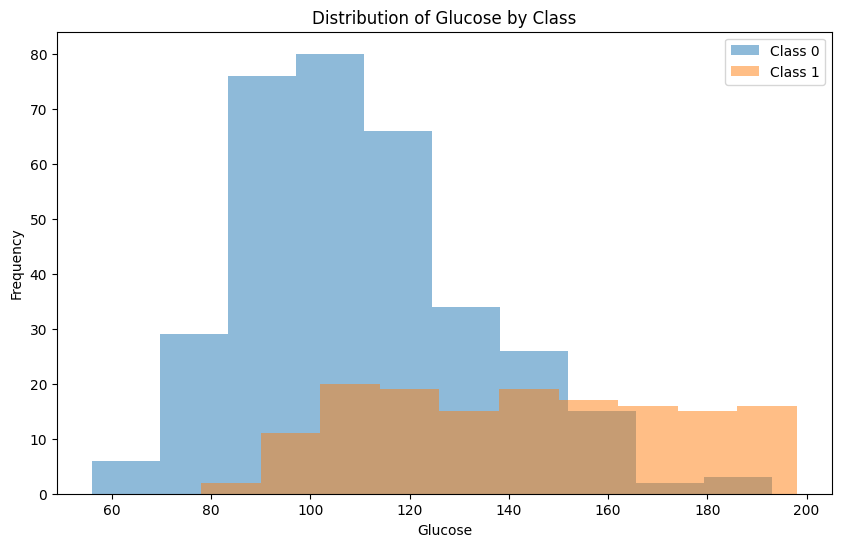

In [54]:
# Q5. check distribution of target variable 'class'  with  'glucose'.
# Group data by 'Glucose' and 'Class' and count occurrences
glucose_class_counts = df_no_outliers.groupby(['Glucose', 'Class'])['Class'].count().unstack(fill_value=0)
# alternative way to visualize the glucose distribution
plt.figure(figsize=(10, 6))
plt.hist(df_no_outliers[df_no_outliers['Class'] == 0]['Glucose'], alpha=0.5, label='Class 0')
plt.hist(df_no_outliers[df_no_outliers['Class'] == 1]['Glucose'], alpha=0.5, label='Class 1')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose by Class')
plt.legend()
plt.show()


### Q5. check distribution of target variable 'class'  with  'BMI'.

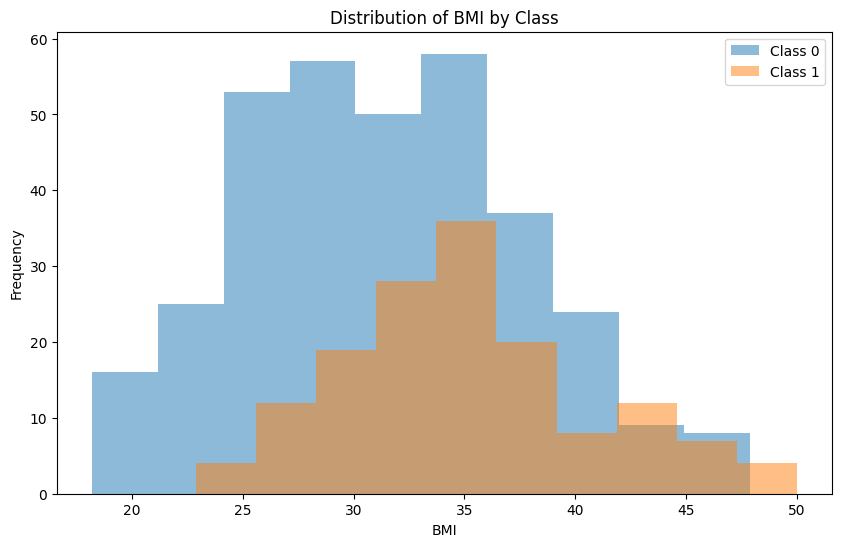

In [55]:
# Create a histogram to visualize the distribution of BMI for each class
plt.figure(figsize=(10, 6))
plt.hist(df_no_outliers[df_no_outliers['Class'] == 0]['BMI'], alpha=0.5, label='Class 0')
plt.hist(df_no_outliers[df_no_outliers['Class'] == 1]['BMI'], alpha=0.5, label='Class 1')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI by Class')
plt.legend()
plt.show()


### Q6. check distribution of target variable 'class'  with  'Diabetes_Pedigree'.

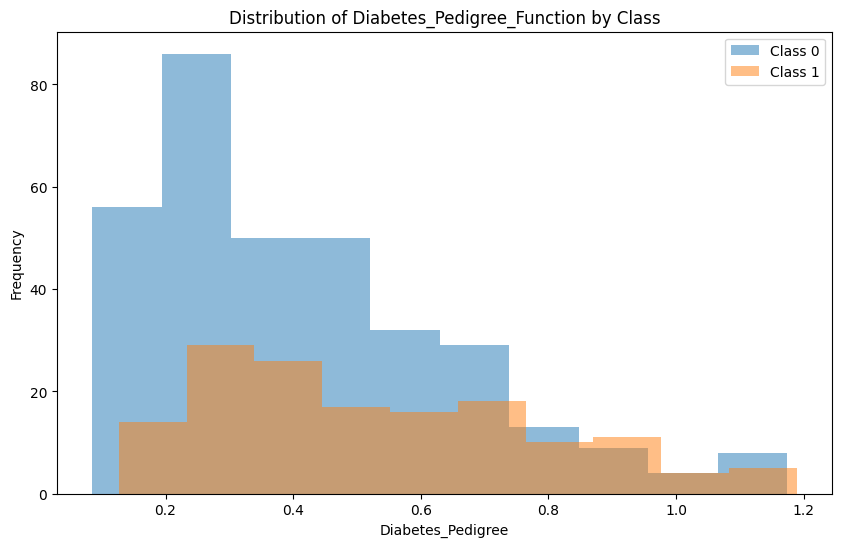

In [56]:
# Create a histogram to visualize the distribution of Diabetes_Pedigree_Function for each class
plt.figure(figsize=(10, 6))
plt.hist(df_no_outliers[df_no_outliers['Class'] == 0]['Diabetes_Pedigree'], alpha=0.5, label='Class 0')
plt.hist(df_no_outliers[df_no_outliers['Class'] == 1]['Diabetes_Pedigree'], alpha=0.5, label='Class 1')
plt.xlabel('Diabetes_Pedigree')
plt.ylabel('Frequency')
plt.title('Distribution of Diabetes_Pedigree_Function by Class')
plt.legend()
plt.show()
